<a href="https://colab.research.google.com/github/hariprithika707/Ship-Fuel-Price-Prediction/blob/main/ship_fuel_sih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures




In [ ]:
data = pd.read_csv("/content/final_features.csv")
data.head()

In [ ]:
data.shape

In [ ]:
# check for null values

print(data.isnull().sum())


In [ ]:
data.info()


In [ ]:
data.describe()


In [ ]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))



In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data.info()


In [ ]:
# subsetting
data_subset = data.iloc[:, 1:]
print(data_subset.head())


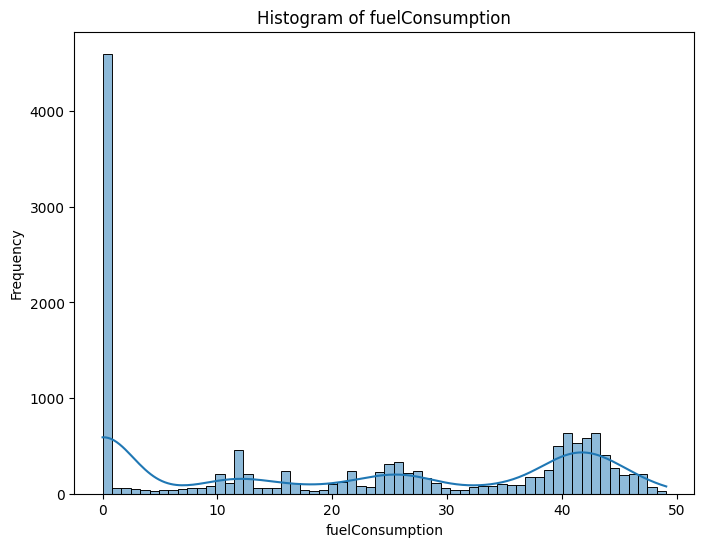

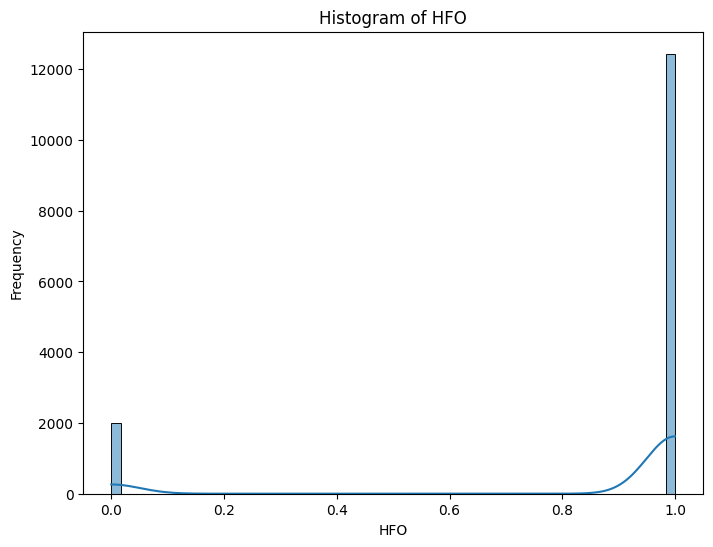

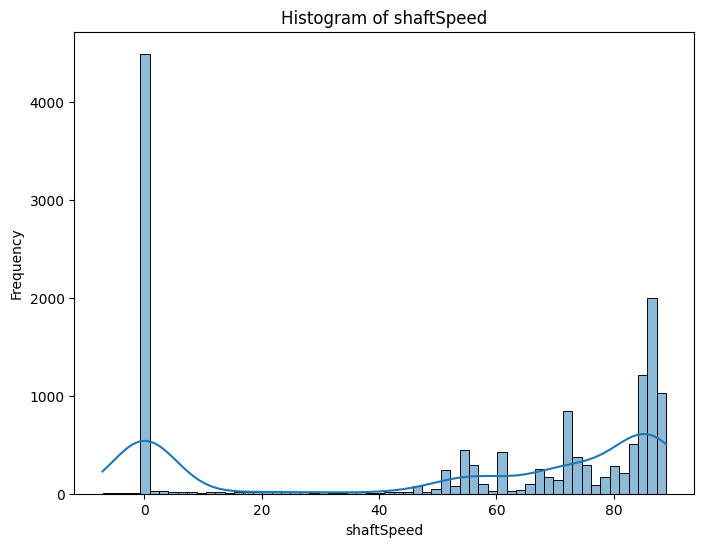

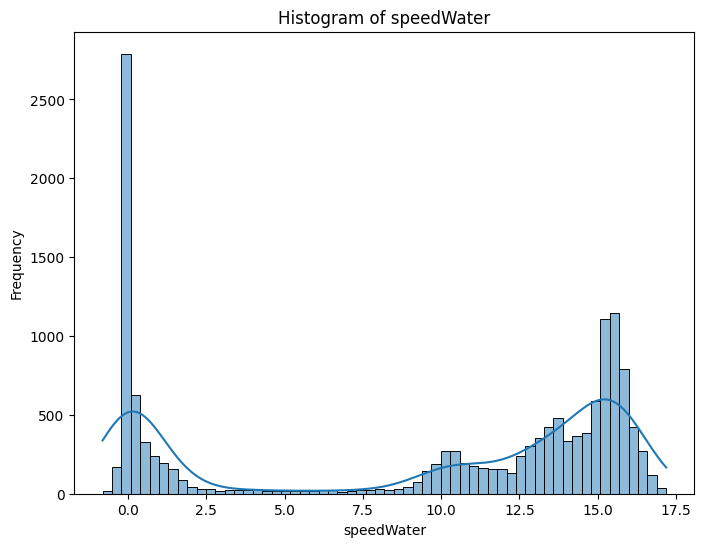

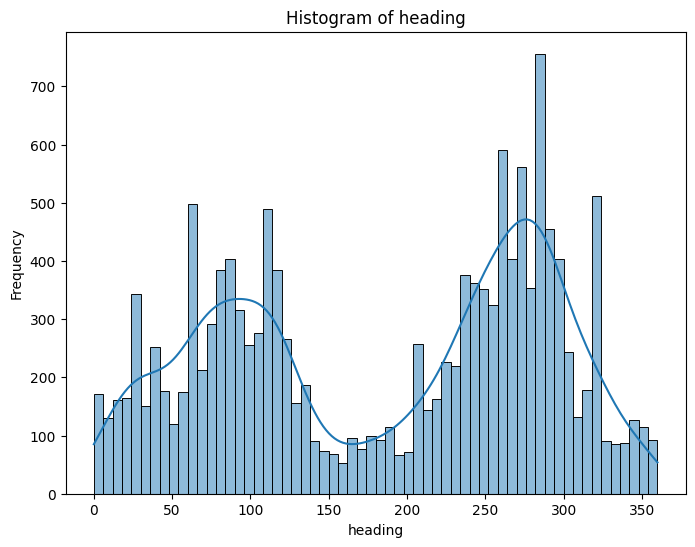

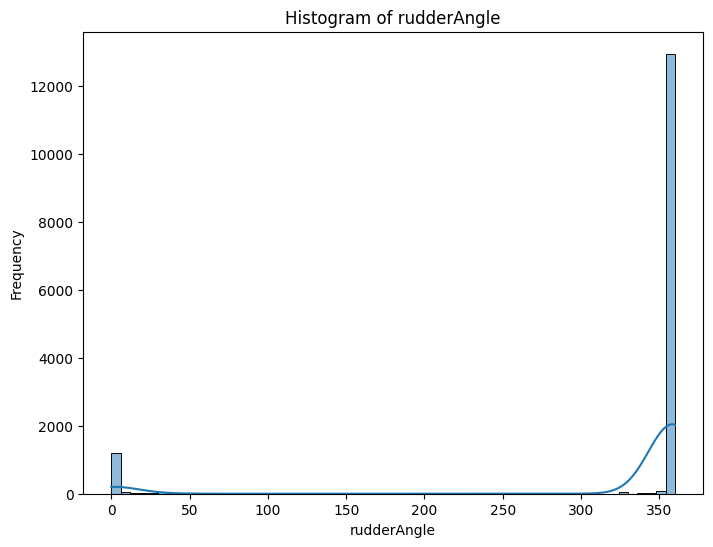

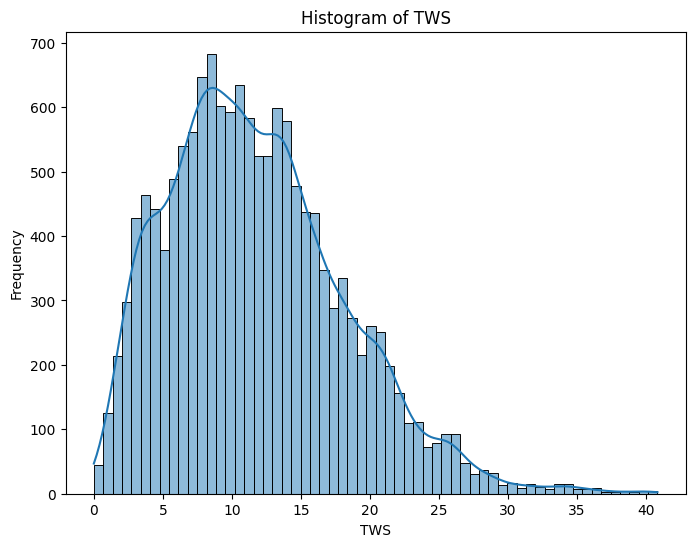

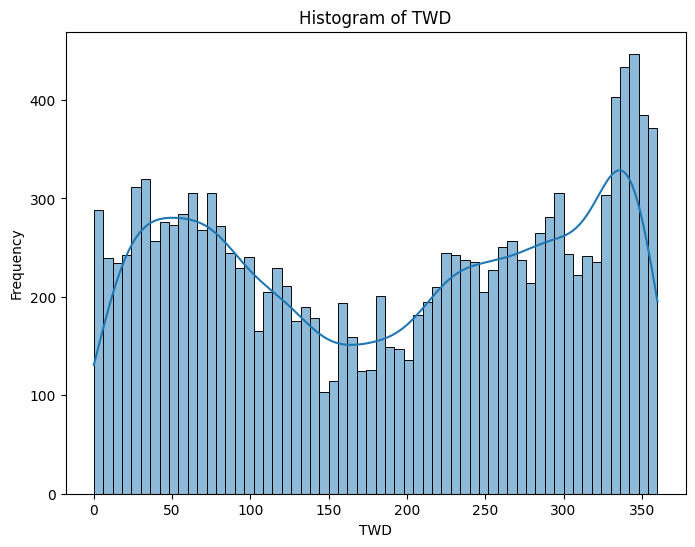

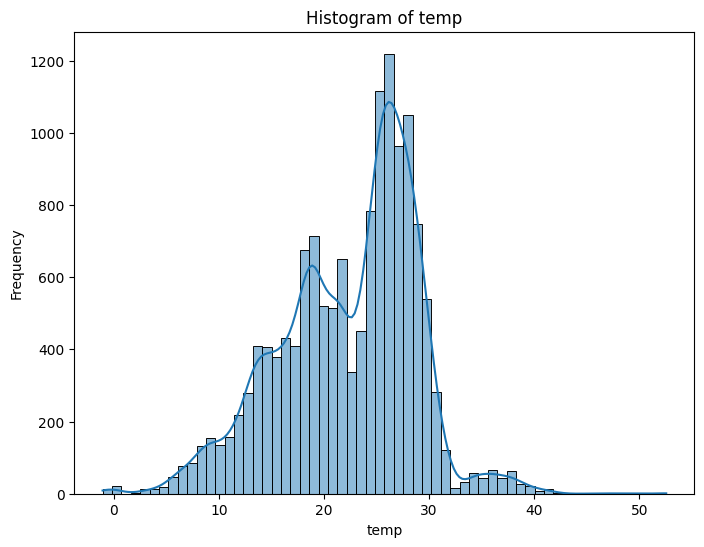

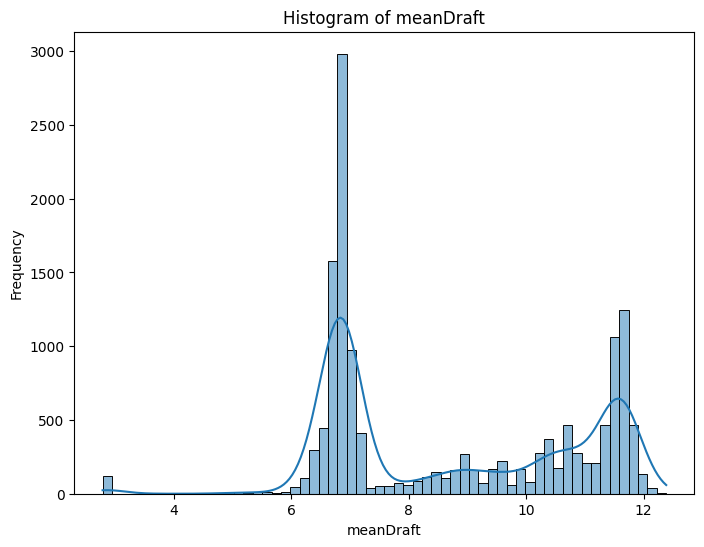

In [ ]:
# univariate analysis of data_subset

import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column in the subset and create a histogram
for column in data_subset.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.histplot(data_subset[column], bins=60, kde=True)  # kde=True adds a kernel density estimate
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


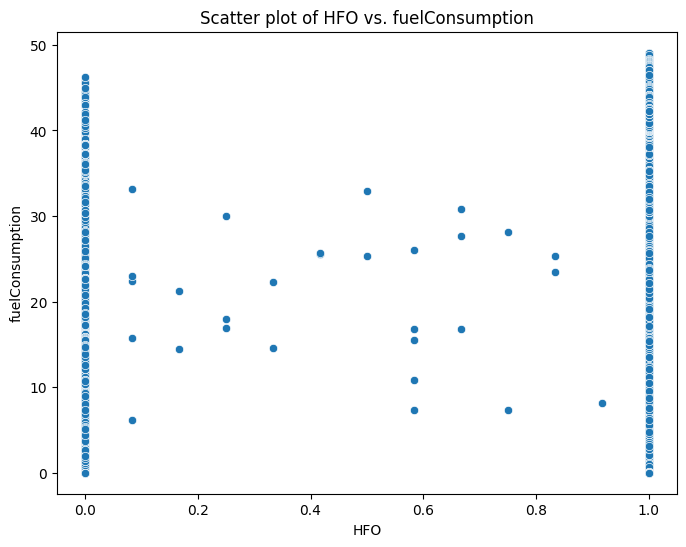

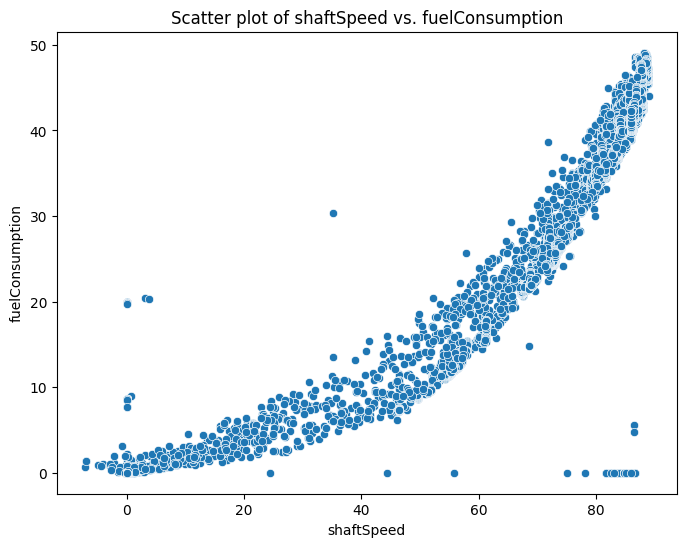

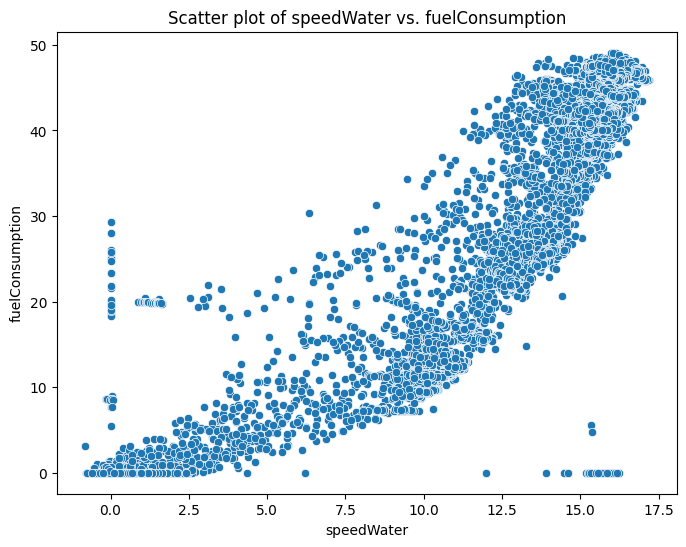

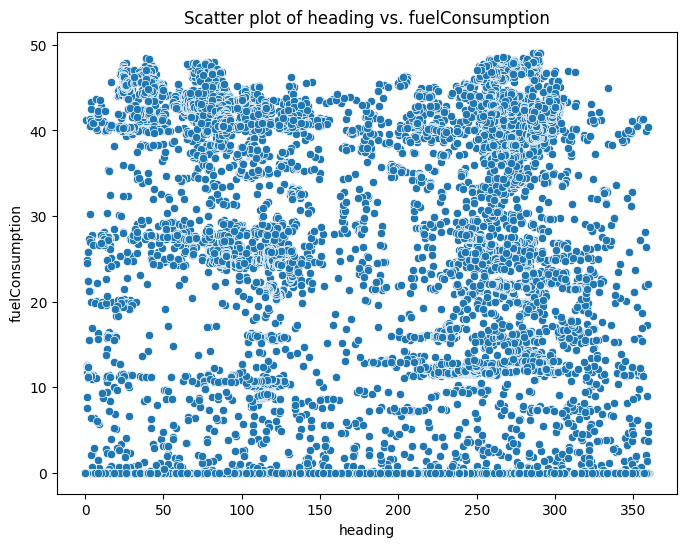

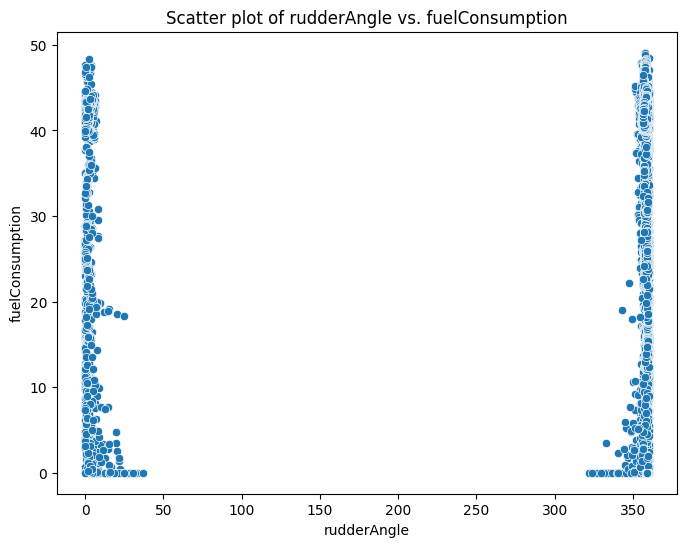

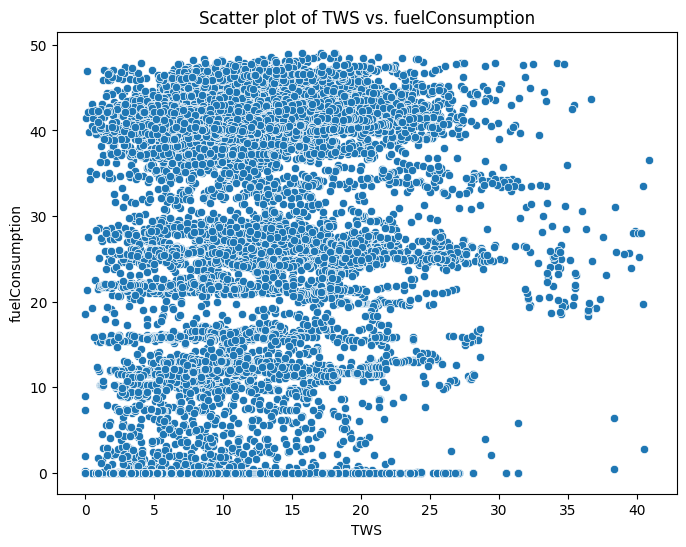

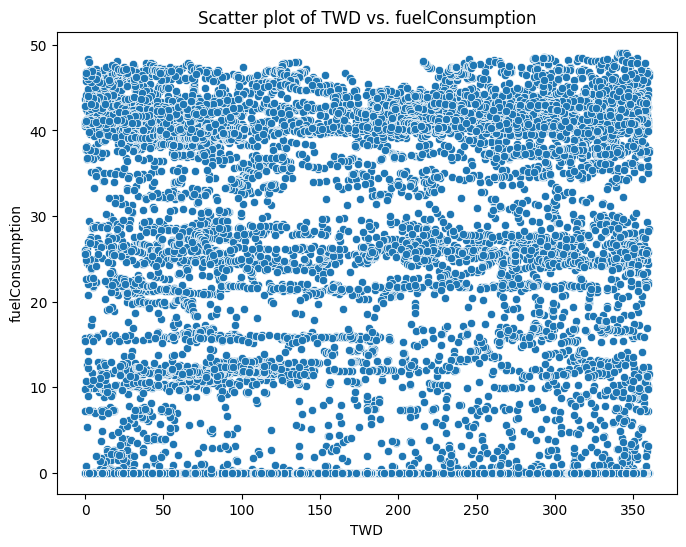

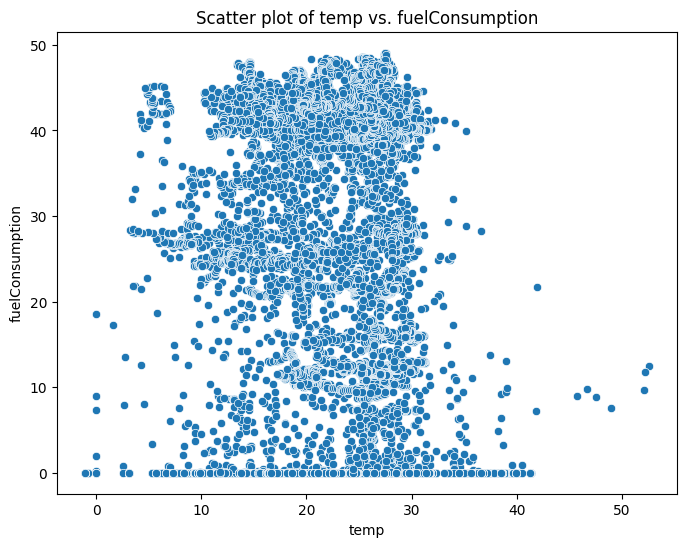

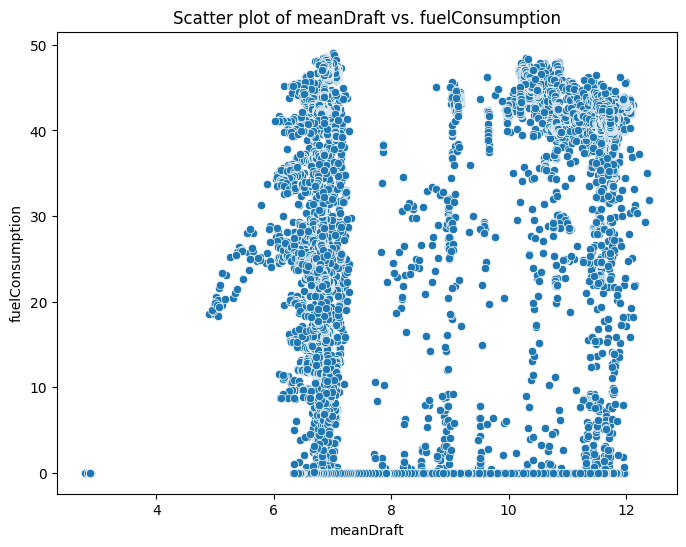

In [ ]:
# bivariate analysis of data_subset

# Assuming 'fuelConsumption' is your target variable
target_variable = 'fuelConsumption'


x_variables = [col for col in data_subset.columns if col != target_variable]

for x_variable in x_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_subset[x_variable], y=data_subset[target_variable])
    plt.title(f'Scatter plot of {x_variable} vs. {target_variable}')
    plt.xlabel(x_variable)
    plt.ylabel(target_variable)
    plt.show()




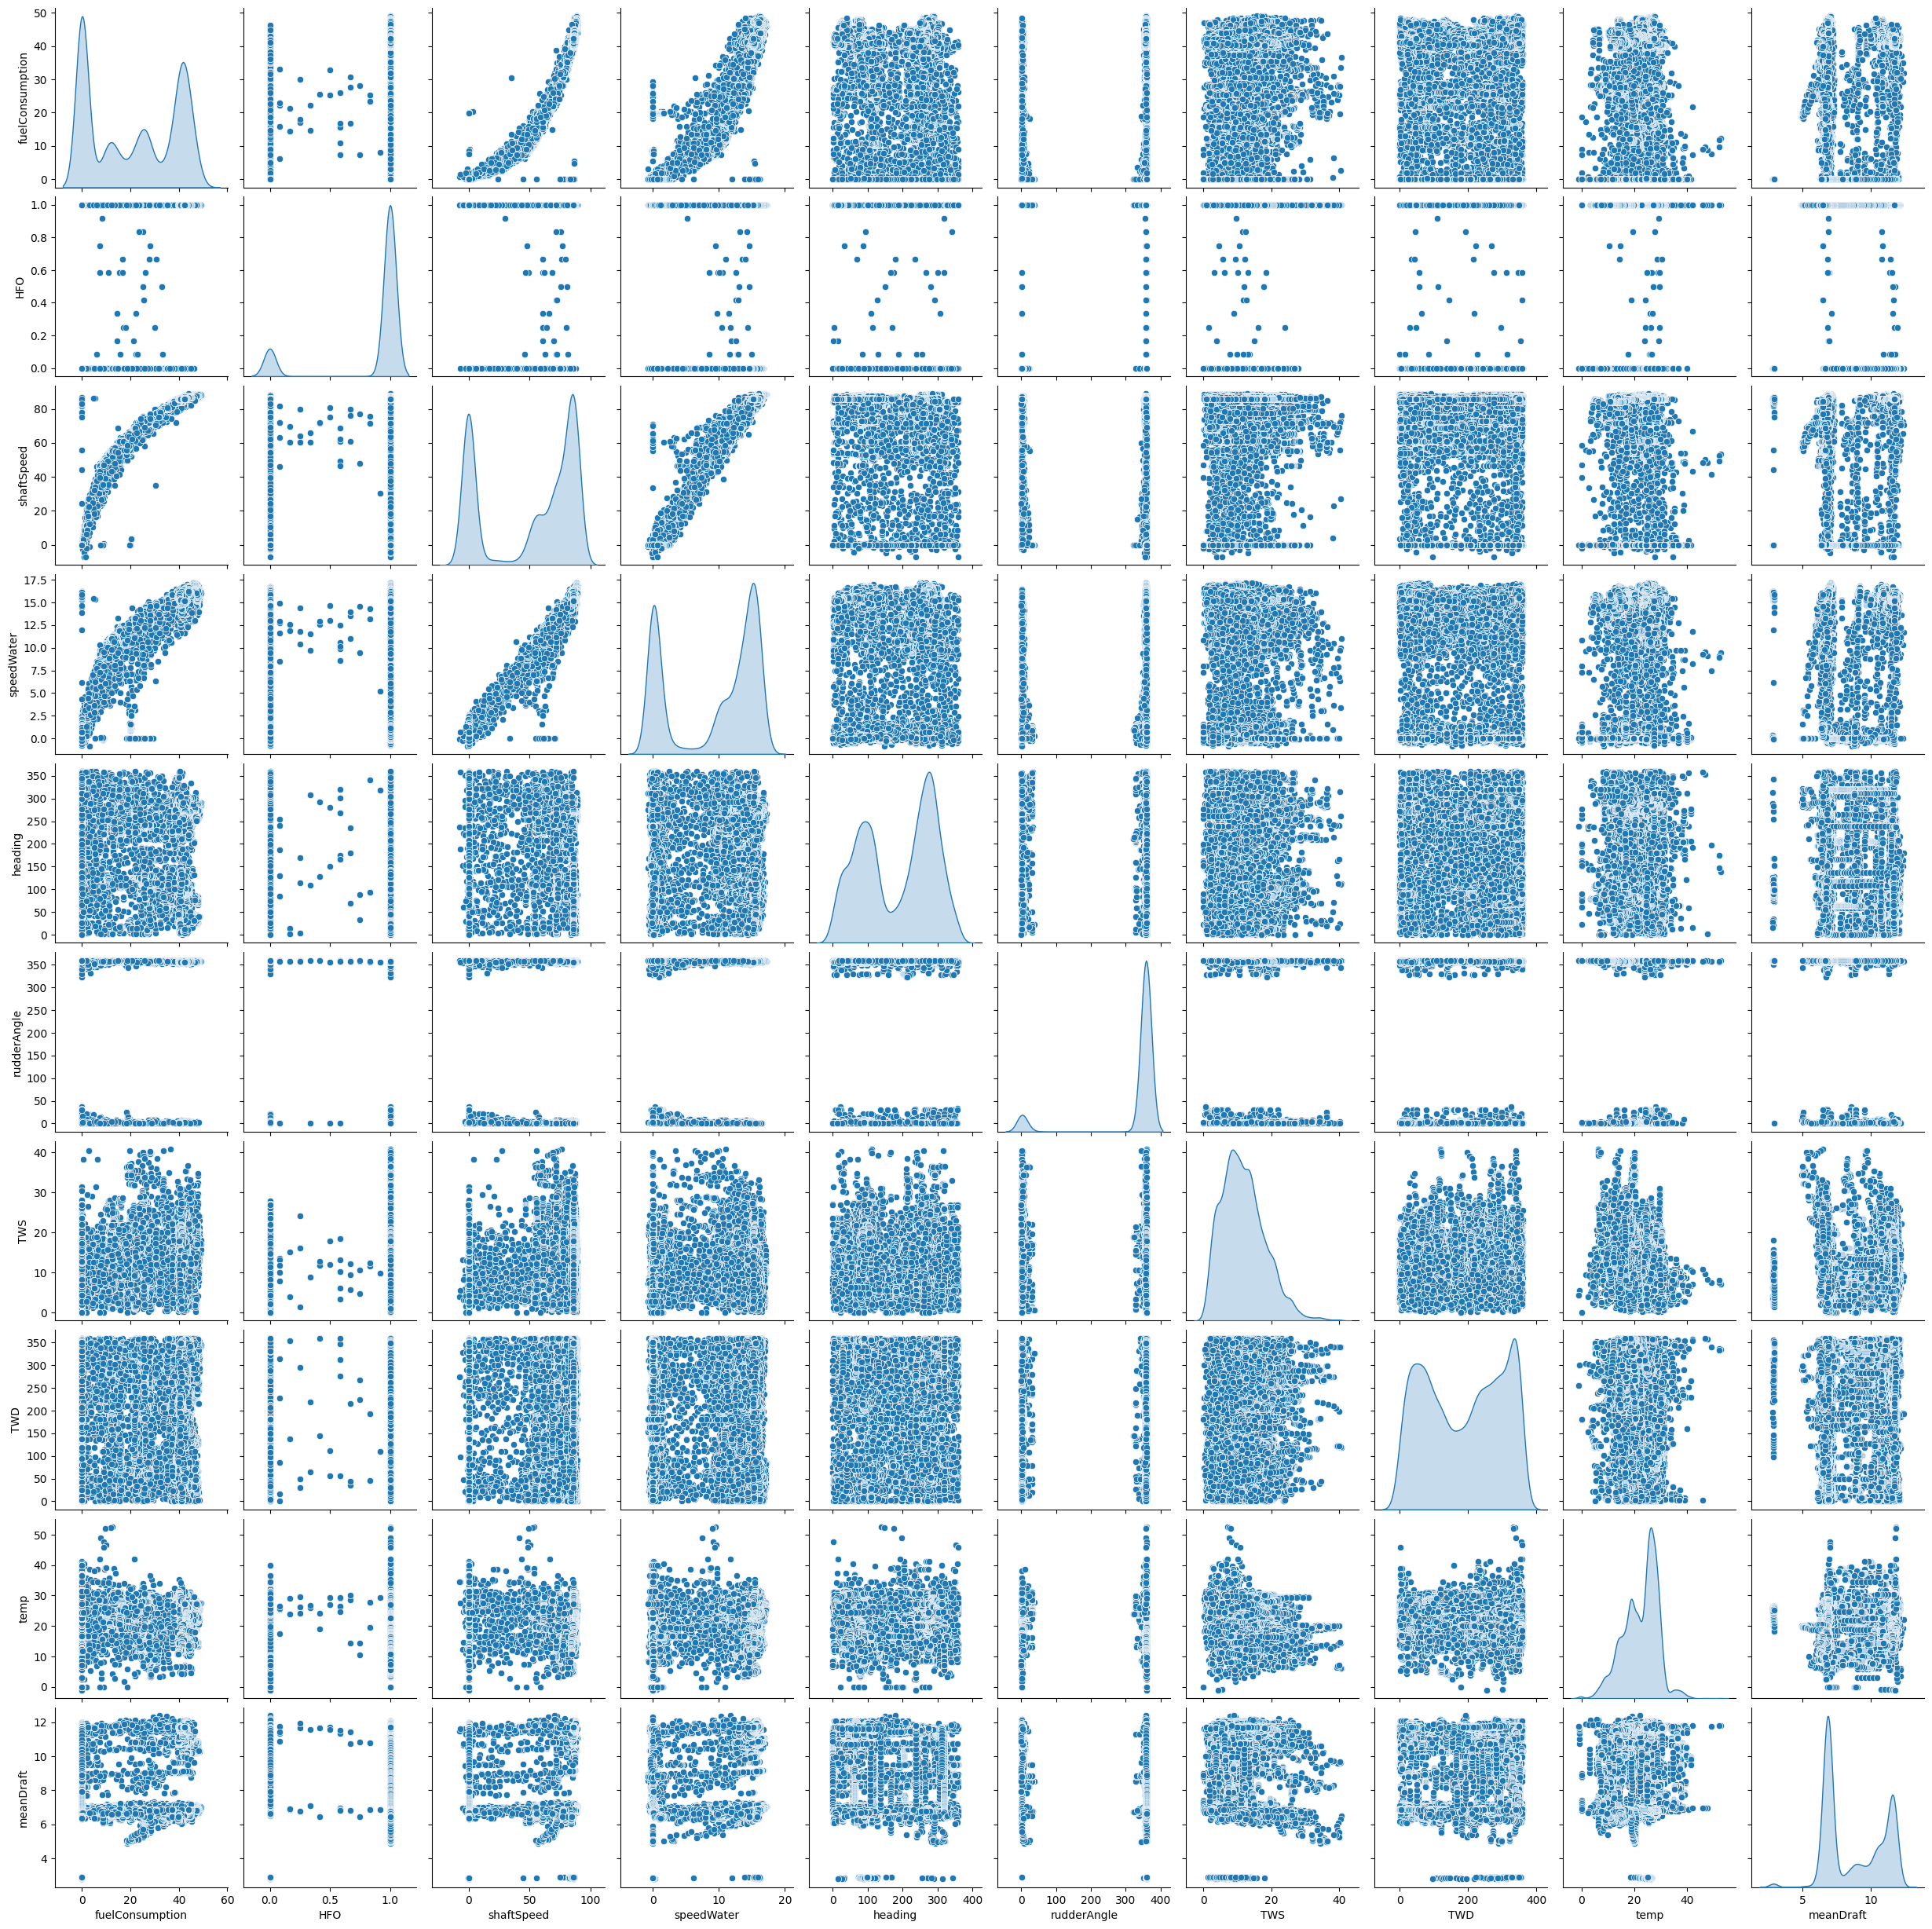

In [ ]:
# multivariate analysis of data_subset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for multivariate analysis
sns.pairplot(data_subset, diag_kind='kde')
plt.show()




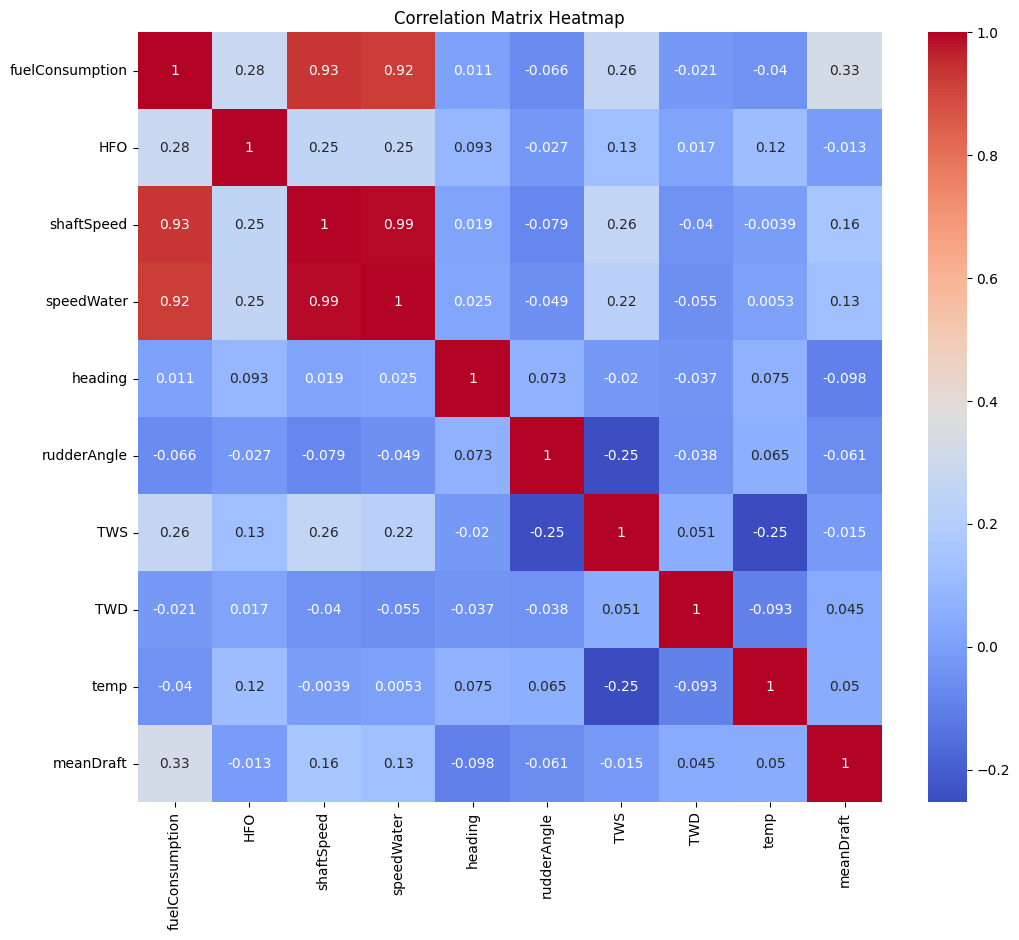

In [ ]:
# heatmap of subset
plt.figure(figsize=(12, 10))
correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:

import statsmodels.api as sm

# Define the independent variables (features) and dependent variable (target)
X = data[['HFO', 'shaftSpeed', 'speedWater', 'heading', 'rudderAngle', 'TWS', 'TWD', 'temp', 'meanDraft']]
y = data['fuelConsumption']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()
# Get the summary of the model, including the p-values
summary = model.summary()
print(summary)

# Extract the p-values specifically
p_values = model.pvalues
print(p_values)



                            OLS Regression Results                            
Dep. Variable:        fuelConsumption   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.663e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:55:25   Log-Likelihood:                -44685.
No. Observations:               14476   AIC:                         8.939e+04
Df Residuals:                   14466   BIC:                         8.947e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.7056      0.346    -48.222      

In [ ]:


# Define the threshold for p-value
p_threshold = 0.05

# Prepare the data: X (independent variables) and y (dependent variable)
X = data[['HFO', 'shaftSpeed', 'speedWater', 'heading', 'rudderAngle', 'TWS', 'TWD', 'temp', 'meanDraft']]
y = data['fuelConsumption']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Perform backward elimination
while True:
    # Fit the model
    model = sm.OLS(y, X).fit()

    # Get p-values for all variables
    p_values = model.pvalues

    # Find the variable with the highest p-value
    max_p_value = p_values.max()

    # If the highest p-value is greater than the threshold, remove the variable
    if max_p_value > p_threshold:
        max_p_variable = p_values.idxmax()
        print(f"Removing {max_p_variable} with p-value {max_p_value}")
        X = X.drop(columns=[max_p_variable])  # Drop the variable with highest p-value
    else:
        break

# Display the final model summary
print(model.summary())


Removing TWD with p-value 0.6930124179868762
                            OLS Regression Results                            
Dep. Variable:        fuelConsumption   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.871e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:55:25   Log-Likelihood:                -44685.
No. Observations:               14476   AIC:                         8.939e+04
Df Residuals:                   14467   BIC:                         8.946e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define the feature set without the constant for VIF calculation
X_vif = data[['HFO', 'shaftSpeed', 'speedWater', 'heading', 'rudderAngle', 'TWS', 'temp', 'meanDraft']]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display the VIF values
print(vif_data)


       Feature         VIF
0          HFO    7.617173
1   shaftSpeed  204.196415
2   speedWater  203.856873
3      heading    4.259333
4  rudderAngle    9.234424
5          TWS    4.556507
6         temp   11.356356
7    meanDraft   12.793213


In [ ]:
# Check correlation between shaftSpeed and speedWater
correlation_matrix = data[['shaftSpeed', 'speedWater']].corr()
print(correlation_matrix)

# If correlation is high, remove one of the variables (e.g., shaftSpeed)
X_vif_reduced = X_vif.drop(columns=['speedWater'])

# Recalculate VIF after removing the variable
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_vif_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_vif_reduced.values, i) for i in range(X_vif_reduced.shape[1])]

# Display the new VIF values
print(vif_data_reduced)


            shaftSpeed  speedWater
shaftSpeed    1.000000    0.991532
speedWater    0.991532    1.000000
       Feature        VIF
0          HFO   7.559004
1   shaftSpeed   3.371181
2      heading   4.255655
3  rudderAngle   8.646932
4          TWS   4.342690
5         temp  11.313340
6    meanDraft  12.327005


In [ ]:

# Define the feature set after removing 'shaftSpeed'
X = data[['HFO', 'shaftSpeed', 'heading', 'rudderAngle', 'TWS', 'temp', 'meanDraft']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = data['fuelConsumption']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        fuelConsumption   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 2.136e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:55:25   Log-Likelihood:                -44692.
No. Observations:               14476   AIC:                         8.940e+04
Df Residuals:                   14468   BIC:                         8.946e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.8902      0.334    -50.583      

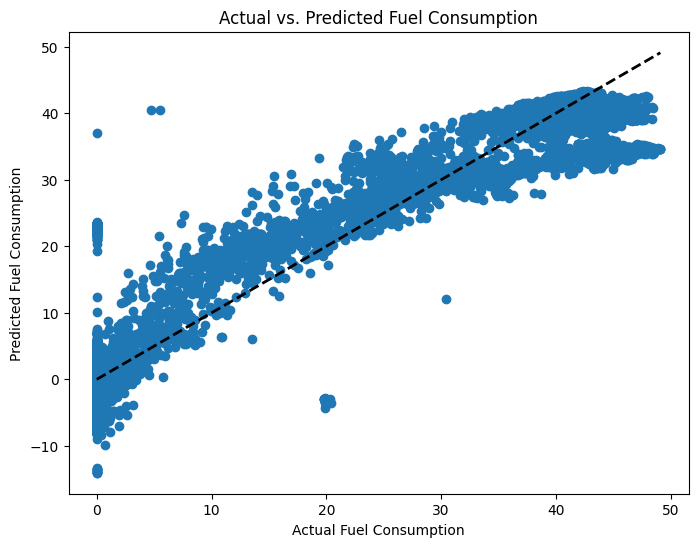

In [ ]:

# Assuming 'model' is your fitted OLS model
# Get predicted values from the model
y_pred = model.predict(X)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs. Predicted Fuel Consumption")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()


In [ ]:


# Define the feature set and target variable
X = data[['HFO', 'shaftSpeed', 'heading', 'rudderAngle', 'TWS', 'temp', 'meanDraft']]
y = data['fuelConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R-squared:", ridge_r2)


Ridge Regression MSE: 28.17687106782823
Ridge Regression R-squared: 0.9124952879070719


In [ ]:

# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R-squared:", lasso_r2)


Lasso Regression MSE: 28.55061366543985
Lasso Regression R-squared: 0.911334611183168


In [ ]:


# Define the model
ridge_model = Ridge()

# Create a range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up the GridSearchCV
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the model
ridge_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_model = ridge_grid_search.best_estimator_

print("Best Ridge Alpha:", best_ridge_alpha)

# Evaluate the best model
y_pred_ridge_best = best_ridge_model.predict(X_test)
ridge_best_mse = mean_squared_error(y_test, y_pred_ridge_best)
ridge_best_r2 = r2_score(y_test, y_pred_ridge_best)

print("Best Ridge Regression MSE:", ridge_best_mse)
print("Best Ridge Regression R-squared:", ridge_best_r2)


Best Ridge Alpha: 10
Best Ridge Regression MSE: 28.1831932588928
Best Ridge Regression R-squared: 0.9124756540198469


In [ ]:

# Define the range of alpha values to test
alphas = np.logspace(-4, 4, 100)

# Create and fit the LassoCV model
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Get the best alpha value
best_lasso_alpha = lasso_cv.alpha_
print("Best Lasso Alpha:", best_lasso_alpha)

# Evaluate the best model
y_pred_lasso_best = lasso_cv.predict(X_test)
lasso_best_mse = mean_squared_error(y_test, y_pred_lasso_best)
lasso_best_r2 = r2_score(y_test, y_pred_lasso_best)

print("Best Lasso Regression MSE:", lasso_best_mse)
print("Best Lasso Regression R-squared:", lasso_best_r2)


Best Lasso Alpha: 0.00021049041445120198
Best Lasso Regression MSE: 28.176746499476337
Best Lasso Regression R-squared: 0.9124956747604505


In [ ]:

X = data[['HFO', 'shaftSpeed', 'heading', 'rudderAngle', 'TWS', 'temp', 'meanDraft']]
y = data['fuelConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Polynomial Regression MSE: 5.742909936127855
Polynomial Regression R-squared: 0.9821650999031519


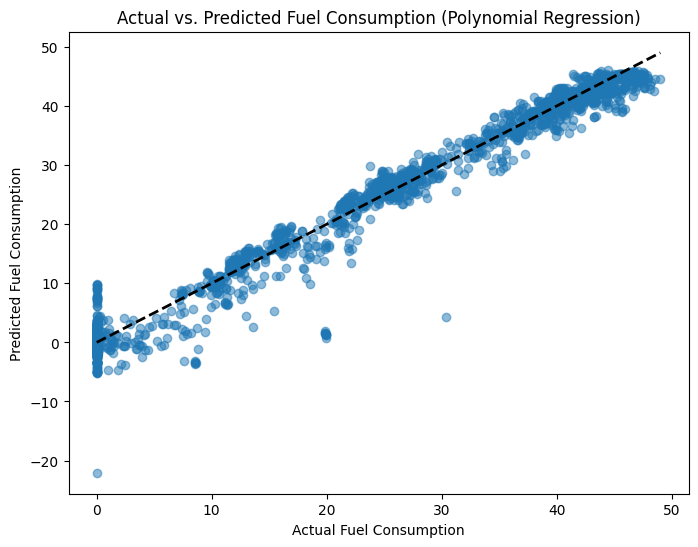

In [ ]:
# Create polynomial features
degree = 2  # You can adjust the degree based on your needs
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test_poly)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", poly_mse)
print("Polynomial Regression R-squared:", poly_r2)

# Assuming y_test and y_pred_poly are your actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs. Predicted Fuel Consumption (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()



Polynomial Regression MSE: 2.7195045468742896
Polynomial Regression R-squared: 0.9915544397446829


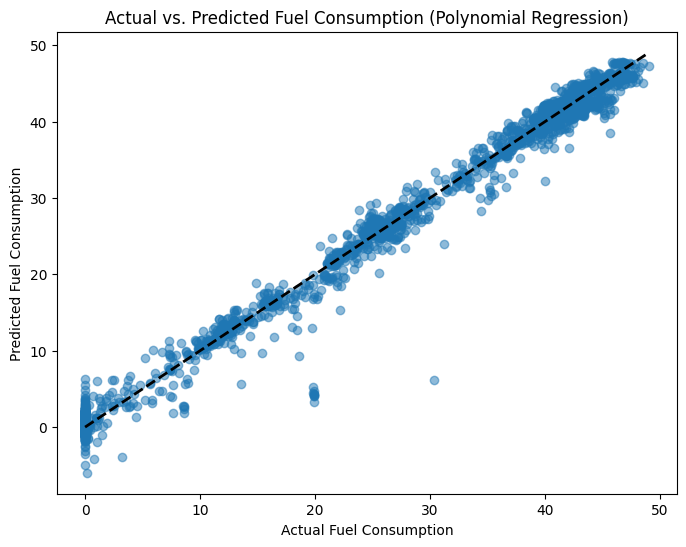

In [ ]:
# Create polynomial features
degree = 3  # You can adjust the degree based on your needs
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test_poly)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", poly_mse)
print("Polynomial Regression R-squared:", poly_r2)

# Assuming y_test and y_pred_poly are your actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs. Predicted Fuel Consumption (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


Polynomial Regression MSE: 2.335021866849013
Polynomial Regression R-squared: 0.992748470343018


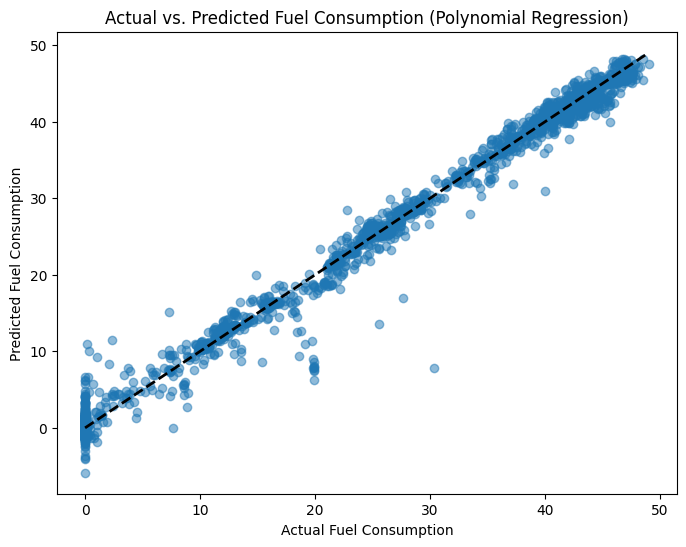

In [ ]:
# Create polynomial features
degree = 4  # You can adjust the degree based on your needs
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test_poly)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", poly_mse)
print("Polynomial Regression R-squared:", poly_r2)

# Assuming y_test and y_pred_poly are your actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs. Predicted Fuel Consumption (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
# prompt: i want user interface to predict fuel consumption with input as meanDraft

#@title Fuel Consumption Prediction

meanDraft = 15 #@param {type:"number"}


# Assuming your best model is 'best_ridge_model' or 'lasso_cv'

model = lasso_cv

# Create a DataFrame with the user's input for meanDraft
user_input = pd.DataFrame({'meanDraft': [meanDraft]})

# Add the other features required by your model, filling them with the mean or
# appropriate values if you don't have them from user input
user_input['HFO'] = data['HFO'].mean()  # Replace with actual values if available
user_input['shaftSpeed'] = data['shaftSpeed'].mean()
user_input['heading'] = data['heading'].mean()
user_input['rudderAngle'] = data['rudderAngle'].mean()
user_input['TWS'] = data['TWS'].mean()
user_input['temp'] = data['temp'].mean()

# Ensure the columns are in the same order as during training
user_input = user_input[['HFO', 'shaftSpeed', 'heading', 'rudderAngle', 'TWS', 'temp', 'meanDraft']]

# Predict fuel consumption using the model and the user's input
predicted_fuel_consumption = model.predict(user_input)

print(f"Predicted Fuel Consumption: {predicted_fuel_consumption[0]:.2f}")

Predicted Fuel Consumption: 31.18


In [ ]:
# prompt: save the model as pickle file

import pickle

# Assuming 'lasso_cv' is your trained model
model_to_save = lasso_cv

# Specify the filename for the pickle file
filename = 'fuel_consumption_model.pkl'

# Save the model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(model_to_save, file)

print(f"Model saved to {filename}")


Model saved to fuel_consumption_model.pkl


In [ ]:
# prompt: download the .pkl model

from google.colab import files

files.download('fuel_consumption_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>